## GRIP :The Spark Foundation

### Data Science and Buisness Analytics - Task 1

#### Prediction using Unsupervised Machine Learning

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

# to ignore warning
import warnings as wg 
wg.filterwarnings("ignore")

In [10]:
df = pd.read_csv('Iris.csv')

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.shape

(150, 6)

In [13]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
iris = pd.DataFrame(df)
iris_df =iris.drop(columns = ['Species','Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the optimum number of cluster

In [18]:
within_cluster_sum_of_square = []
cluster_range = range(1,15)
for k in cluster_range:
    km = KMeans(n_clusters = k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

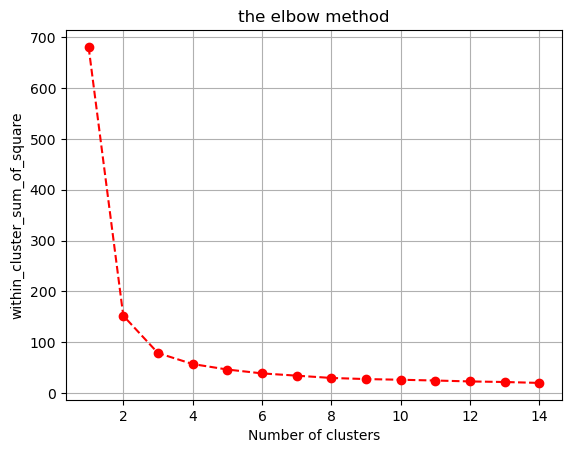

In [20]:
plt.plot(cluster_range, within_cluster_sum_of_square,'go--',color ='red')
plt.title('the elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_square')
plt.grid()
plt.show()

In [22]:
#Applying K means clustering on the data

from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predicitions = model.fit_predict(iris_df)

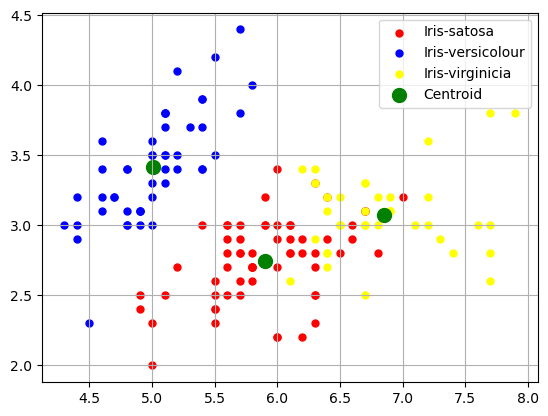

In [24]:
#visualization of the cluster
x = iris_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[predicitions == 0,0], x[predicitions == 0,1], s = 25, c ='red' , label = 'Iris-satosa')
plt.scatter(x[predicitions == 1,0], x[predicitions == 1,1], s = 25, c ='blue' , label = 'Iris-versicolour')
plt.scatter(x[predicitions == 2,0], x[predicitions == 2,1], s = 25, c ='yellow' , label = 'Iris-virginicia')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100 , c = 'green' , label = 'Centroid')
plt.legend()
plt.grid()
plt.show()